# Plot & Analysis of ETA Only Simulations

This notebook contains the code necessary read tallies and plot spectra for ETA only NIF simulations.    

## Compare Results with Different Input Source Sources
Compare Applebe, built-in 10.75 keV Gaussian fusion, and TOF measured source.

In [27]:
from GeneralNuclear.MCNP import read_tally

applebePath='ETA_10.75keV-Appelbe-src.out'
(applebe, applebeTot, applebeTot) = read_tally(applebePath, 4, readGroups=True, splitTally=False)
applebe['absUncert']=applebe['uncertainty']*applebe['tally']

gaussianPath='ETA_10.75keV-src.out'
(gaussian, gaussianTot, gaussianTot) = read_tally(gaussianPath, 4, readGroups=True, splitTally=False)
gaussian['absUncert']=gaussian['uncertainty']*gaussian['tally']

tofPath='ETA_tof-src.out'
(tof, tofTot, tofTot) = read_tally(tofPath, 4, readGroups=True, splitTally=False)
tof['absUncert']=tof['uncertainty']*tof['tally']

Convert to Histograms and plot the flux.

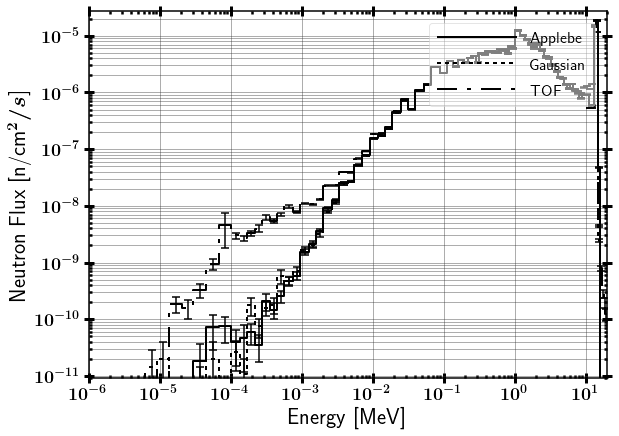

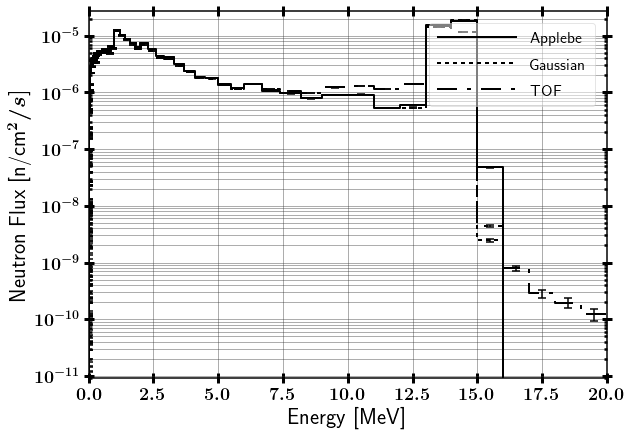

In [28]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

applebeHisto = Histogram()
applebeHisto.build_histo(applebe['bin'].tolist(), applebe['tally'].tolist(), uncert=applebe['absUncert'].tolist(),
                     edgeLoc='up', name='Applebe')

gaussianHisto = Histogram()
gaussianHisto.build_histo(gaussian['bin'].tolist(), gaussian['tally'].tolist(), uncert=gaussian['absUncert'].tolist(),
                     edgeLoc='up', name='Gaussian')

tofHisto = Histogram()
tofHisto.build_histo(tof['bin'].tolist(), tof['tally'].tolist(), uncert=tof['absUncert'].tolist(),
                     edgeLoc='up', name='TOF')

applebeHisto.plot(gaussianHisto, tofHisto, xMin=1E-6, xMax=20, logX=True, logY=True, includeMarkers=False,
                  xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm^2/s]',
                  savePath='Input_Src_Comp_log')
applebeHisto.plot(gaussianHisto, tofHisto, xMin=1E-6, xMax=20, logX=False, logY=True, includeMarkers=False,
                  xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm^2/s]',
                  savePath='Input_Src_Comp_lin')

Convert from differential spectrum and plot.

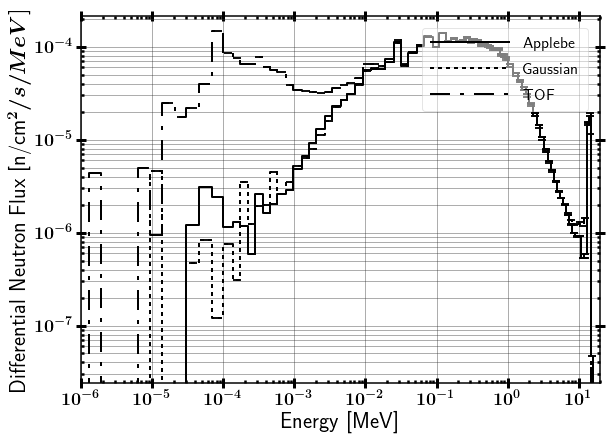

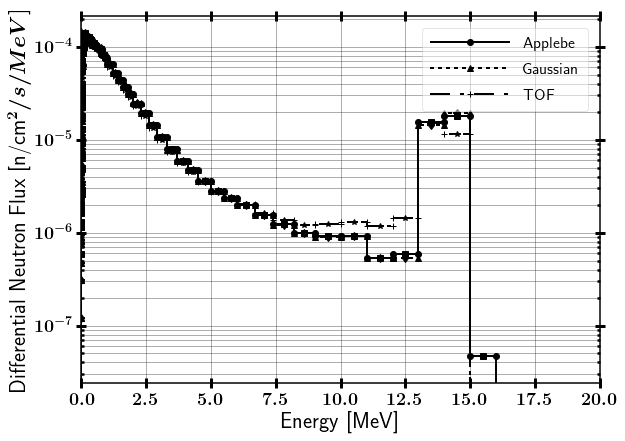

In [29]:
from DataAnalysis.DataManipulation import bin_differentiation

applebe['diffTally']=bin_differentiation(applebe['bin'].tolist(), applebe['tally'].tolist(), 'up')
applebe['absDiffUncert']=applebe['uncertainty']*applebe['diffTally']
applebeDiffHisto = Histogram()
applebeDiffHisto.build_histo(applebe['bin'].tolist(), applebe['diffTally'].tolist(), uncert=applebe['absDiffUncert'].tolist(),
                     edgeLoc='up', name='Applebe')

gaussian['diffTally']=bin_differentiation(gaussian['bin'].tolist(), gaussian['tally'].tolist(), 'up')
gaussian['absDiffUncert']=gaussian['uncertainty']*gaussian['diffTally']
gaussianDiffHisto = Histogram()
gaussianDiffHisto.build_histo(gaussian['bin'].tolist(), gaussian['diffTally'].tolist(), uncert=gaussian['absDiffUncert'].tolist(),
                     edgeLoc='up', name='Gaussian')

tof['diffTally']=bin_differentiation(tof['bin'].tolist(), tof['tally'].tolist(), 'up')
tof['absDiffUncert']=tof['uncertainty']*tof['diffTally']
tofDiffHisto = Histogram()
tofDiffHisto.build_histo(tof['bin'].tolist(), tof['diffTally'].tolist(), uncert=tof['absDiffUncert'].tolist(),
                     edgeLoc='up', name='TOF')

applebeDiffHisto.plot(gaussianDiffHisto, tofDiffHisto, xMin=1E-6, xMax=20, logX=True, logY=True, includeMarkers=False,
                  xLabel='Energy [MeV]', yLabel='Differential Neutron Flux [n/cm^2/s/MeV]',
                  savePath='Input_Src_Comp_log')
applebeDiffHisto.plot(gaussianDiffHisto, tofDiffHisto, xMin=1E-6, xMax=20, logX=False, logY=True,
                  xLabel='Energy [MeV]', yLabel='Differential Neutron Flux [n/cm^2/s/MeV]',
                  savePath='Input_Src_Comp_lin')